In [2]:
%matplotlib inline
import sys
sys.path.append("/Users/mmeier/Desktop/new_arena/")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import pylab

In [4]:
fly0_LO = np.load('T4T5_ctrl_dirtun_2016-11-04_16.58LO.npy').mean(1)
fly0_ME = np.load('T4T5_ctrl_dirtun_2016-11-04_16.58ME.npy').mean(1)
fly0_LP = np.load('T4T5_ctrl_dirtun_2016-11-04_16.58LP.npy').mean(1)

fly1_LO = np.load('T4T5_ctrl_dirtun_2016-11-07_18.30LO.npy').mean(1)
fly1_ME = np.load('T4T5_ctrl_dirtun_2016-11-07_18.30ME.npy').mean(1)
fly1_LP = np.load('T4T5_ctrl_dirtun_2016-11-07_18.30LP.npy').mean(1)

fly2_LO = np.load('T4T5_ctrl_dirtun_2016-11-10_15.33LO.npy').mean(1)
fly2_ME = np.load('T4T5_ctrl_dirtun_2016-11-10_15.33ME.npy').mean(1)
fly2_LP = np.load('T4T5_ctrl_dirtun_2016-11-10_15.33LP.npy').mean(1)

fly3_LO = np.load('T4T5_ctrl_dirtun_2016-11-15_17.20LO.npy').mean(1)
fly3_ME = np.load('T4T5_ctrl_dirtun_2016-11-15_17.20ME.npy').mean(1)
fly3_LP = np.load('T4T5_ctrl_dirtun_2016-11-15_17.20LP.npy').mean(1)

fly4_LO = np.load('T4T5_ctrl_dirtun_2016-11-16_15.17LO.npy').mean(1)
fly4_ME = np.load('T4T5_ctrl_dirtun_2016-11-16_15.17ME.npy').mean(1)
fly4_LP = np.load('T4T5_ctrl_dirtun_2016-11-16_15.17LP.npy').mean(1)

fly5_LO = np.load('T4T5_ctrl_dirtun_2016-11-18_16.52LO.npy').mean(1)
fly5_ME = np.load('T4T5_ctrl_dirtun_2016-11-18_16.52ME.npy').mean(1)
fly5_LP = np.load('T4T5_ctrl_dirtun_2016-11-18_16.52LP.npy').mean(1)

fly6_LO = np.load('T4T5_SHI_ctrl_dirtun_2016-11-21_15.37LO.npy').mean(1)
fly6_ME = np.load('T4T5_SHI_ctrl_dirtun_2016-11-21_15.37ME.npy').mean(1)
fly6_LP = np.load('T4T5_SHI_ctrl_dirtun_2016-11-21_15.37LP.npy').mean(1)

single_tuningsLO = np.array([fly0_LO, fly1_LO, fly2_LO, fly3_LO, fly4_LO, fly5_LO, fly6_LO])
single_tuningsME = np.array([fly0_ME, fly1_ME, fly2_ME, fly3_ME, fly4_ME, fly5_ME, fly6_ME])
single_tuningsLP = np.array([fly0_LP, fly1_LP, fly2_LP, fly3_LP, fly4_LP, fly5_LP, fly6_LP])

SEM_LO = stats.sem(single_tuningsLO)
SEM_ME = stats.sem(single_tuningsME)
SEM_LP = stats.sem(single_tuningsLP)

mean_tuningLO = np.mean(single_tuningsLO, axis = 0)
mean_tuningME = np.mean(single_tuningsME, axis = 0)
mean_tuningLP = np.mean(single_tuningsLP, axis = 0)

mean_tuning = np.array([mean_tuningLO, mean_tuningME, mean_tuningLP])
SEMs = np.array([SEM_LO, SEM_ME, SEM_LP])

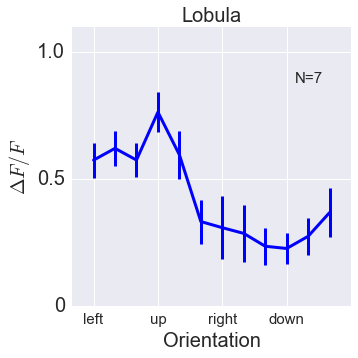

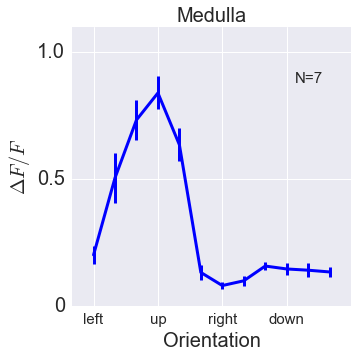

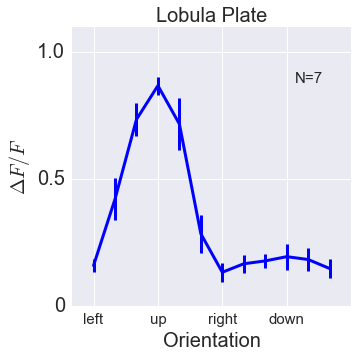

In [5]:
# plot everything

regions = [0,1,2]

for region in regions:
    plt.figure(figsize = (5,5))
    ax = plt.subplot(111)

    # here, we manually define the x-axis
    orientation_tuning = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]


    # plot single tunings with a lower alpha
    plt.errorbar(orientation_tuning, mean_tuning[region,:], yerr = SEMs[region,:], color = 'b', linewidth = 3.0)


    # define the x-axis and ticks etc...
    ax.set_xlim([-30,360])
    ax.set_xticks([0,90,180,270])
    ax.set_xticklabels(['left','up','right','down'], fontsize = 15.)
    ax.set_xlabel('Orientation', fontsize = 20.)

    # define the y-axis and ticks etc...
    plt.ylim([0,1.1])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels([0, 0.5, 1.0], fontsize = 20.)
    ax.set_ylabel('$\Delta F/F$', fontsize = 20.)      
        
    if region == 0:
        plt.title ("Lobula", fontsize = 20.)
        open('dir_tun' + 'LO.npy','w')
        np.save('dir_tun' + 'LO.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLO)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'LO.png')
        
    elif region == 1:
        plt.title ("Medulla", fontsize = 20.)
        open('dir_tun' + 'ME.npy','w')
        np.save('dir_tun' + 'ME.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsME)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'ME.png')
        
    elif region == 2:
        plt.title ("Lobula Plate", fontsize = 20.)
        open('dir_tun' + 'LP.npy','w')
        np.save('dir_tun' + 'LP.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLP)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'LP.png')
        